### 가설 4:

**불일치율은 연령대 / 동반자별로 차이가 없다.**

### 세부 가설

#### 1. **연령대에 따른 불일치율 차이**

* **귀무가설 H₀**: 연령대별로 불일치율의 차이는 없다.
* **대립가설 H₁**: 연령대별로 불일치율의 차이가 있다.

---

#### 2. **여행 동반자 유형에 따른 불일치율 차이**

* **귀무가설 H₀**: 동반자 유형별로 불일치율의 차이는 없다.
* **대립가설 H₁**: 동반자 유형별로 불일치율의 차이가 있다.

### **불일치율 분석의 의의와 활용 가능성**

* 불일치율이란 여행자가 말한 동기와 실제 방문행동이 일치하지 않는 정도
   - "여행동기-방문지역유형 간의 대응표를 사전에 정의하고, 해당 대응 여부를 기준으로 불일치율을 산출함."

* 불일치율을 분석한 이유?
   - 여행 기획/ 추천 시스템 또는 관광정책설계에 있어서 "사람들이 말한 것" 과 "실제로 하는 것"의 차이를 파악하기 위함

#### 1. **여행 기획 및 추천 시스템의 정밀도 향상**

* 사용자가 말한 선호(여행동기)만을 기반으로 추천할 경우 실제 행동과 불일치할 수 있음.
* **불일치율이 높은 유형**을 파악하면, 선호 기반보다는 **행동 기반 추천**이 더 효과적인 집단을 식별 가능.
* 예: "힐링을 원한다"고 말했지만 놀이공원과 쇼핑 위주로 활동 → 감성적 키워드보다 실질적 패턴 분석이 중요함.

#### 2. **관광 정책 설계에서의 인사이트 도출**

* 정책은 종종 ‘수요자의 니즈’를 기반으로 설계됨.
* 하지만 \*\*표면적 수요(설문 등)\*\*와 실제 방문행태가 다를 경우, 정책 효율이 떨어질 수 있음.
* 불일치율이 낮은 연령대/동반자 그룹 → **정책 타겟팅이 쉬움**
  불일치율이 높은 그룹 → **직접적 행동 데이터를 중시한 접근 필요**

#### 3. **타깃 마케팅 전략 개선**

* 마케팅 시 ‘말한 것’만 믿고 홍보하면 실구매나 방문으로 연결되지 않을 수 있음.
* 예: ‘자연’을 선호한다는 60대가 실제로는 문화시설이나 식당을 자주 방문한다면, **광고 타깃과 콘텐츠 전략을 수정**할 수 있음.

#### 4. **행동-의도 간 간극의 사회심리학적 해석**

* 불일치율은 **사람들이 의도와 행동이 어떻게 엇갈리는지를 보여주는 실증 지표**임.
* 나이나 동반자 유형에 따라 그 간극이 달라진다면, **라이프스타일, 동기이론, 제약요인** 등에 대한 후속 연구가 가능함.

---

### 정리 문장 예시 (보고서/논문용)

> 본 연구는 여행자가 진술한 여행동기와 실제 방문행태 간의 차이를 정량화한 ‘불일치율’을 분석함으로써, 관광 수요 예측 및 추천 시스템의 정밀도를 향상시키고, 정책 수립 시 실효성 있는 타겟팅 전략 수립에 기여하고자 한다. 또한, 불일치율은 의도와 행동 간 간극을 보여주는 지표로써, 여행자의 내적 동기와 외적 행동을 통합적으로 이해하는 데 중요한 단서를 제공한다.



In [32]:
import pandas as pd
import numpy as np
trav_mas_df = pd.read_csv('../../data/east/불일치율_분석결과.csv')

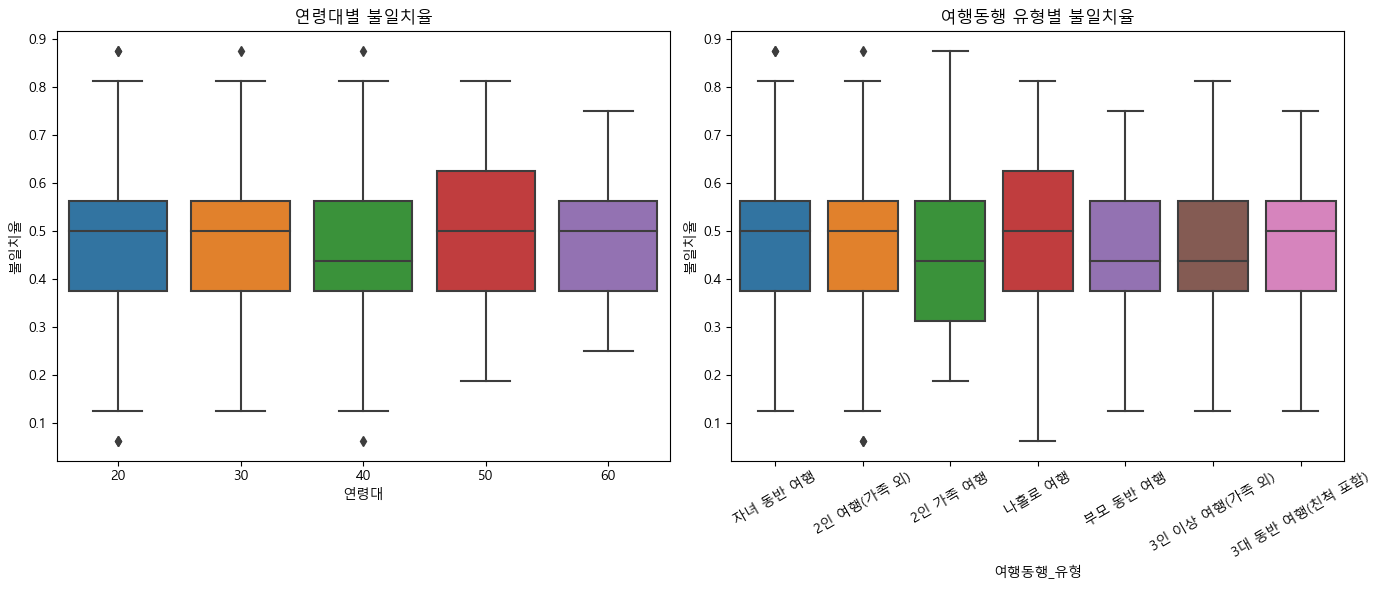

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 깨짐 방지 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 그림 틀 설정
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 연령대별 불일치율
sns.boxplot(data=trav_mas_df, x='연령대', y='불일치율', ax=axes[0])
axes[0].set_title('연령대별 불일치율')

# 여행동행 유형별 불일치율
sns.boxplot(data=trav_mas_df, x='여행동행_유형', y='불일치율', ax=axes[1])
axes[1].set_title('여행동행 유형별 불일치율')
axes[1].tick_params(axis='x', rotation=30)  # 라벨 기울이기

plt.tight_layout()
plt.show()

In [11]:
from scipy.stats import shapiro

# 결과 저장용
results = []

# 연령대별 정규성 검정
for name, group in trav_mas_df.groupby('연령대'):
    stat, p = shapiro(group['불일치율'])
    results.append((name, len(group), stat, p))

# 결과 보기
import pandas as pd
result_df = pd.DataFrame(results, columns=['연령대', '샘플 수', 'Shapiro-W', 'p-value'])
result_df['정규성 여부'] = result_df['p-value'].apply(lambda p: '정규성 만족' if p > 0.05 else '위반')
result_df.sort_values(by='연령대')


,연령대,샘플 수,Shapiro-W,p-value,정규성 여부
0,20,1262,0.978754,1.131773e-12,위반
1,30,1291,0.974753,3.026198e-14,위반
2,40,637,0.976443,1.341270e-08,위반
3,50,265,0.963916,3.349491e-06,위반
4,60,98,0.961530,5.808468e-03,위반


In [12]:
results = []

for name, group in trav_mas_df.groupby('여행동행_유형'):
    stat, p = shapiro(group['불일치율'])
    results.append((name, len(group), stat, p))

result_df = pd.DataFrame(results, columns=['동행유형', '샘플 수', 'Shapiro-W', 'p-value'])
result_df['정규성 여부'] = result_df['p-value'].apply(lambda p: '정규성 만족' if p > 0.05 else '위반')
result_df.sort_values(by='p-value')


,동행유형,샘플 수,Shapiro-W,p-value,정규성 여부
4,나홀로 여행,994,0.972498,8.900558e-13,위반
1,2인 여행(가족 외),1007,0.976447,1.043542e-11,위반
6,자녀 동반 여행,499,0.976802,4.025417e-07,위반
3,3인 이상 여행(가족 외),515,0.977912,5.000841e-07,위반
0,2인 가족 여행,279,0.967329,5.714237e-06,위반
5,부모 동반 여행,179,0.975637,3.145871e-03,위반
2,3대 동반 여행(친척 포함),80,0.968885,4.819047e-02,위반


In [27]:
from scipy.stats import kruskal
# 귀무가설(H0)연령대간 불일치율의 분포에 차이가 없다.

groups = [group["불일치율"].values for name, group in trav_mas_df.groupby("연령대")]
stat, p = kruskal(*groups)
print(f"연령대별 Kruskal-Wallis 결과: H={stat:.3f}, p={p:.3f}")

print("\np > 0.05 \n-> 귀무가설 기각 못함 \n연령대에 따라 불일치율은 통계적으로 유의미한 차이가 없다. \n즉, 연령대는 불일치율에 유의한 영향을 주지 않는다. \n즉흥성/계획성과 나이의 직접적 상관은 없다."
)

연령대별 Kruskal-Wallis 결과: H=4.602, p=0.331

p > 0.05 
-> 귀무가설 기각 못함 
연령대에 따라 불일치율은 통계적으로 유의미한 차이가 없다. 
즉, 연령대는 불일치율에 유의한 영향을 주지 않는다. 
즉흥성/계획성과 나이의 직접적 상관은 없다.


In [29]:
groups = [group["불일치율"].values for name, group in trav_mas_df.groupby("여행동행_유형")]
stat, p = kruskal(*groups)
print(f"동행 유형별 Kruskal-Wallis 결과: H={stat:.3f}, p={p:.3f}")

print("\np<0.05  \n-> 귀무가설 기각 \n동행유형에 따라 불일치율은 유의미한 차이가 있다. \n동행자의 유형은 여행자 행동과 동기의 일치성에 영향을 미친다.")

동행 유형별 Kruskal-Wallis 결과: H=19.640, p=0.003

p<0.05  
-> 귀무가설 기각 
동행유형에 따라 불일치율은 유의미한 차이가 있다. 
동행자의 유형은 여행자 행동과 동기의 일치성에 영향을 미친다.


C:\Users\User\AppData\Local\Temp\ipykernel_34824\1353562118.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=trav_mas_df, x='여행동행_유형', y='불일치율', estimator='mean', ci='sd')


Text(0.5, 1.0, '동행유형별 평균 불일치율')

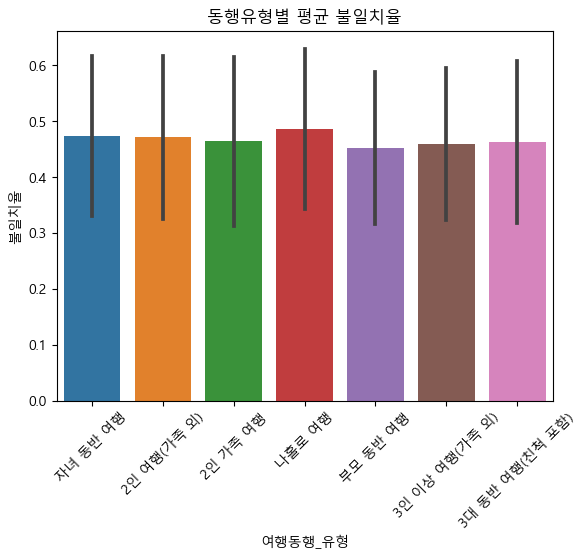

In [30]:
sns.barplot(data=trav_mas_df, x='여행동행_유형', y='불일치율', estimator='mean', ci='sd')
plt.xticks(rotation=45)
plt.title("동행유형별 평균 불일치율")

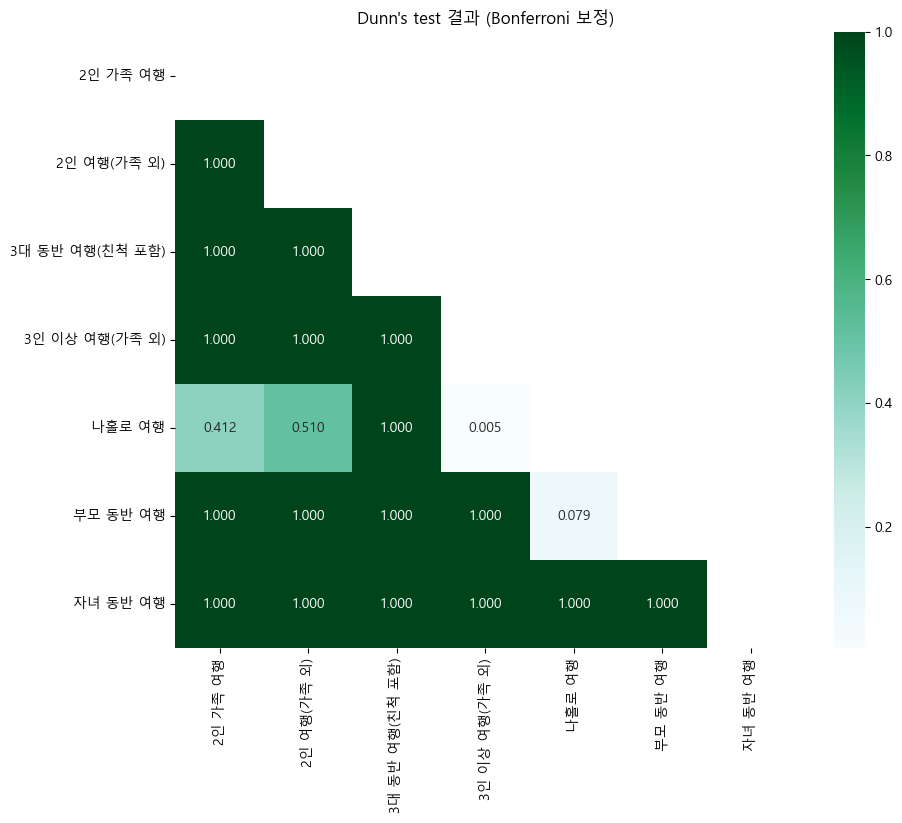

In [40]:
# 사후 검정 (보수적인 분석방법)
import scikit_posthocs as sp
import pandas as pd

# Dunn’s test (Bonferroni 보정 포함)
dunn_result = sp.posthoc_dunn(trav_mas_df, val_col='불일치율', group_col='여행동행_유형', p_adjust='bonferroni')
mask = np.triu(np.ones_like(dunn_result, dtype=bool))
# 결과 확인
plt.figure(figsize=(10, 8))
sns.heatmap(dunn_result,mask=mask ,annot=True, cmap='BuGn', fmt=".3f")
plt.title("Dunn's test 결과 (Bonferroni 보정)")
plt.show()

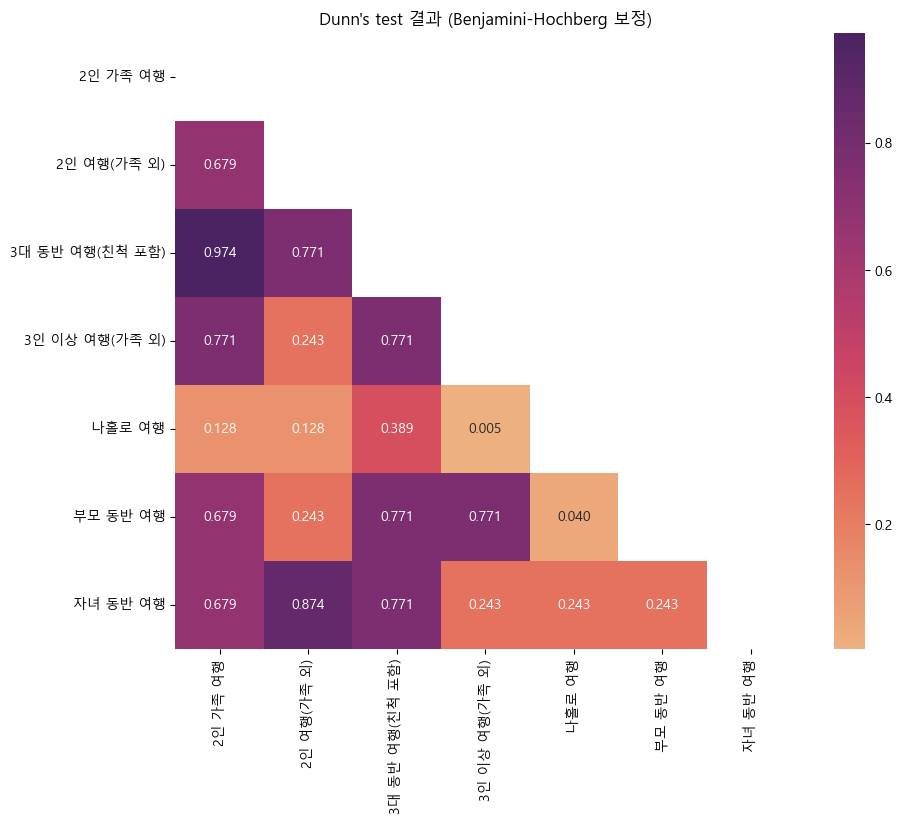

In [44]:
# Dunn’s test (탐색적 분석)
dunn_result = sp.posthoc_dunn(trav_mas_df, val_col='불일치율', group_col='여행동행_유형', p_adjust='fdr_bh')

plt.figure(figsize=(10, 8))
sns.heatmap(dunn_result,mask=mask, annot=True, cmap='flare', fmt=".3f")
plt.title("Dunn's test 결과 (Benjamini-Hochberg 보정)")
plt.show()

### Dunn’s Test 결과 요약 (Benjamini-Hochberg 보정 적용)

- 색이 **연할수록 유의미한 차이**가 있음.
- 유의수준 기준: **α = 0.05**
- 유의미한 쌍 (p < 0.05):
  - **나홀로 여행** vs **3인 이상 여행(가족 외)**
  - **나홀로 여행** vs **부모 동반 여행**

---

Benjamini-Hochberg 보정이 적용된 Dunn’s test 결과,  
**나홀로 여행**과 **3인 이상 가족 외 여행**,  
**나홀로 여행**과 **부모 동반 여행** 간에는 **불일치율의 유의미한 차이**가 나타났다 *(p < 0.05)*.

이는 **여행 동반 유형에 따라 계획과 실제 간의 일치도가 다를 수 있음을 시사**한다.


| 비교쌍                        | Bonferroni 보정 p-value | BH 보정 p-value | 유의 여부 (α=0.05)  |
|:-----------------------------:|:--------------------------:|:------------------:|:---------------------:|
| 나홀로 여행 vs 3인 이상 여행(가족 외) | 0.005                    | 0.005             | 유의함               |
| 나홀로 여행 vs 부모 동반 여행        | 0.079                    | 0.040             | BH만 유의함          |



BH 보정에서는 두 비교쌍 모두 유의미한 차이를 보인 반면, Bonferroni 보정은 한 쌍에서만 유의성이 관찰됨.
